# Deep Learning with PyTorch

In [4]:
#We import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable


### Linear Regression

#### Example

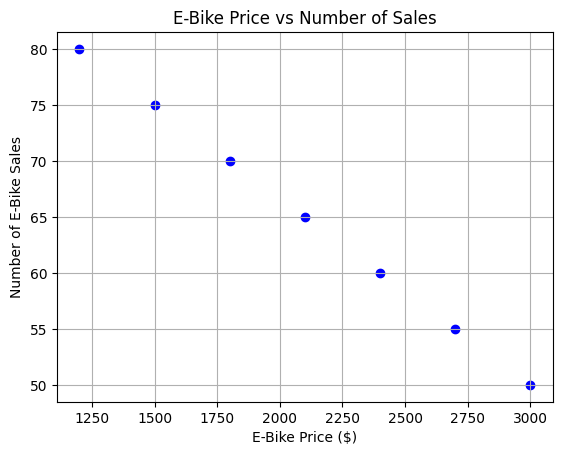

In [5]:
# Context:
# Imagine we have an e-bike company. If the price of the e-bike is lower, we sell more units. If the price is higher, we sell fewer.
# Question: How many e-bikes will we sell if the price is $2500?

# Let's define e-bike prices
e_bike_prices_array = [1200, 1500, 1800, 2100, 2400, 2700, 3000]
e_bike_price_np = np.array(e_bike_prices_array, dtype=np.float32)
e_bike_price_np = e_bike_price_np.reshape(-1, 1)
e_bike_price_tensor = Variable(torch.from_numpy(e_bike_price_np))

# Let's define number of e-bike sales
number_of_e_bike_sell_array = [80, 75, 70, 65, 60, 55, 50]
number_of_e_bike_sell_np = np.array(number_of_e_bike_sell_array, dtype=np.float32)
number_of_e_bike_sell_np = number_of_e_bike_sell_np.reshape(-1, 1)
number_of_e_bike_sell_tensor = Variable(torch.from_numpy(number_of_e_bike_sell_np))

# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(e_bike_prices_array, number_of_e_bike_sell_array, color='blue', marker='o')
plt.xlabel("E-Bike Price ($)")
plt.ylabel("Number of E-Bike Sales")
plt.title("E-Bike Price vs Number of Sales")
plt.grid(True)
plt.show()

Epoch 0, Loss: 4606.75537109375
Epoch 50, Loss: 530.548095703125
Epoch 100, Loss: 467.6064147949219
Epoch 150, Loss: 412.14886474609375
Epoch 200, Loss: 363.26861572265625
Epoch 250, Loss: 320.18548583984375
Epoch 300, Loss: 282.2118835449219
Epoch 350, Loss: 248.7418975830078
Epoch 400, Loss: 219.24147033691406
Epoch 450, Loss: 193.23974609375
Epoch 500, Loss: 170.32176208496094
Epoch 550, Loss: 150.12173461914062
Epoch 600, Loss: 132.3175811767578
Epoch 650, Loss: 116.6248779296875
Epoch 700, Loss: 102.79331970214844
Epoch 750, Loss: 90.60212707519531
Epoch 800, Loss: 79.85680389404297
Epoch 850, Loss: 70.38587951660156
Epoch 900, Loss: 62.03822708129883
Epoch 950, Loss: 54.68063735961914
Epoch 1000, Loss: 48.1955451965332


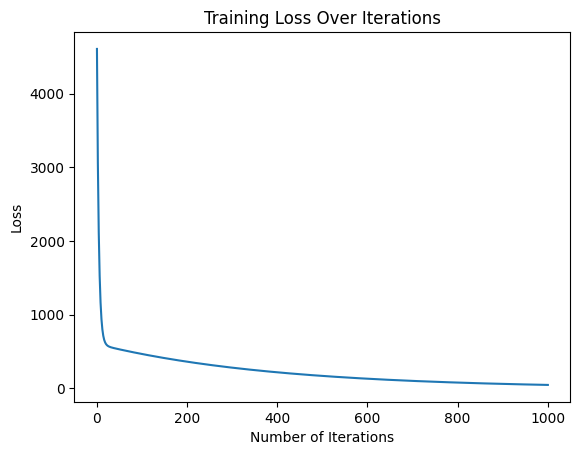

In [6]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Data normalization
e_bike_price_array = [1200, 1500, 1800, 2100, 2400, 2700, 3000]
number_of_e_bike_sell_array = [80, 75, 70, 65, 60, 55, 50]

e_bike_price_tensor = torch.tensor([[p / 1000] for p in e_bike_price_array], dtype=torch.float32)
number_of_e_bike_sell_tensor = torch.tensor([[n] for n in number_of_e_bike_sell_array], dtype=torch.float32)

# Create class
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

# Initialize weights
torch.nn.init.xavier_uniform_(model.linear.weight)
model.linear.bias.data.fill_(0)

# MSE
mse = nn.MSELoss()

# Optimization
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Model training
loss_list = []
iteration_number = 1001

for iteration in range(iteration_number):
    optimizer.zero_grad()  # Optimization
    results = model(e_bike_price_tensor)  # Forward propagation
    loss = mse(results, number_of_e_bike_sell_tensor)  # Calculate loss
    loss.backward()  # Back Propagation
    optimizer.step()  # Update parameters
    loss_list.append(loss.item())  # Store loss

    if iteration % 50 == 0:  # Print loss every 50 iterations
        print(f'Epoch {iteration}, Loss: {loss.item()}')

# Graph loss
plt.plot(range(iteration_number), loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Over Iterations")
plt.show()


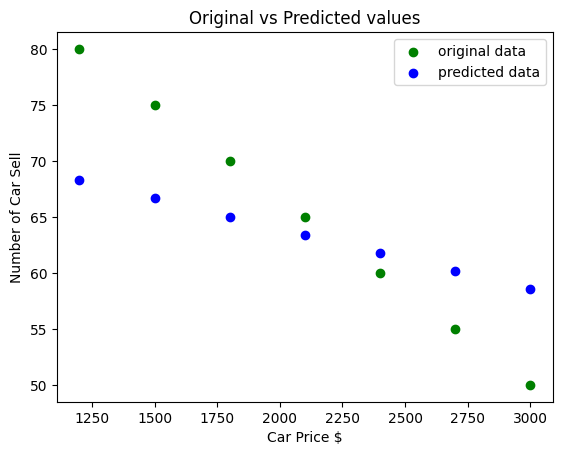

In [7]:
#predict out e_bike price
predicted=model(e_bike_price_tensor).data.numpy()
plt.scatter(e_bike_prices_array, number_of_e_bike_sell_array, label="original data", color="green")
plt.scatter(e_bike_prices_array, predicted, label="predicted data", color="blue")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()


### Logistic Regression

In [8]:
#Import libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive

Mounted at /content/drive


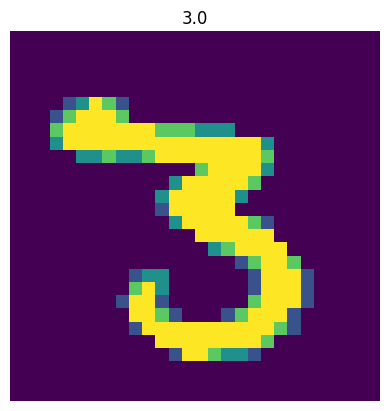

In [9]:
#load data
drive.mount('/content/drive')
ruta='/content/drive/MyDrive/Archivos csv/Segundo proyecto/'
train=pd.read_csv(ruta + 'train.csv', dtype=np.float32)

#split data
targets_numpy=train.label.values
features_numpy=train.loc[:, train.columns!="label"].values/255

features_train, features_test, targets_train, targets_test=train_test_split(features_numpy, targets_numpy, test_size=0.2, random_state=42)

# create feature and targets tensor for train set
featuresTrain=torch.from_numpy(features_train)
targetsTrain=torch.from_numpy(targets_train).type(torch.LongTensor)
featuresTest=torch.from_numpy(features_test)
targetsTest=torch.from_numpy(targets_test).type(torch.LongTensor)

batch_size=100
n_iters=10000
num_epochs=n_iters/(len(features_train)/batch_size)
num_epochs=int(num_epochs)

train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

#data loader
train_loader=DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader=DataLoader(test, batch_size=batch_size, shuffle=False)

# visualize one of the images in data set
plt.imshow(features_numpy[13].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[13]))
plt.savefig('graph.png')
plt.show()

In [10]:
#Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LogisticRegressionModel, self).__init__()
    self.linear=nn.Linear(input_dim, output_dim)

  def forward(self, x):
    out=self.linear(x)
    return out

#Instantiate Model Class
input_dim=28*28 #size of image
output_dim=10 #Labels

#Create logistic regression model
model=LogisticRegressionModel(input_dim, output_dim)
error=nn.CrossEntropyLoss()
learning_rate=0.001
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

In [11]:
#Training the model
count=0
loss_list=[]
iteration_list=[]
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    #variables
    train=Variable(images.view(-1, 28*28))
    labels=Variable(labels)
    #Clear gradients
    optimizer.zero_grad()
    #Forward propagation
    outputs=model(train)
    #calculate softmax and cross entropy loss
    loss=error(outputs, labels)
    #calculate gradients
    loss.backward()
    #update parameters
    optimizer.step()
    count+=1
    #prediction
    if count%50==0:
      #Calculate Accuracy
      correct=0
      total=0
      #predict test dataset
      for images,labels in test_loader:
        test=Variable(images.view(-1, 28*28))
        #forward propagation
        outputs=model(test)
        #get predictions from the maximum value
        predicted=torch.max(outputs.data, 1)[1]
        # Total number of labels
        total+=len(labels)
        # Total correct predictions
        correct+=(predicted==labels).sum()
      accuracy = 100 * correct / float(total)

      loss_list.append(loss.data)
      iteration_list.append(count)
    if count%500==0:
      print('Iteration:{} Loss: {} Accuracy: {}%'.format(count, loss.data, accuracy))


Iteration:500 Loss: 1.824955701828003 Accuracy: 67.4047622680664%
Iteration:1000 Loss: 1.610459327697754 Accuracy: 75.61904907226562%
Iteration:1500 Loss: 1.282341718673706 Accuracy: 78.55952453613281%
Iteration:2000 Loss: 1.1814546585083008 Accuracy: 80.39286041259766%
Iteration:2500 Loss: 1.060872197151184 Accuracy: 81.39286041259766%
Iteration:3000 Loss: 0.9340404272079468 Accuracy: 82.21428680419922%
Iteration:3500 Loss: 0.90415358543396 Accuracy: 82.83333587646484%
Iteration:4000 Loss: 0.746469259262085 Accuracy: 83.53571319580078%
Iteration:4500 Loss: 0.9777613878250122 Accuracy: 83.71428680419922%
Iteration:5000 Loss: 0.7999576330184937 Accuracy: 83.91666412353516%
Iteration:5500 Loss: 0.7461907863616943 Accuracy: 84.29762268066406%
Iteration:6000 Loss: 0.8643648624420166 Accuracy: 84.57142639160156%
Iteration:6500 Loss: 0.651905357837677 Accuracy: 84.78571319580078%
Iteration:7000 Loss: 0.7202977538108826 Accuracy: 85.03571319580078%
Iteration:7500 Loss: 0.6425834894180298 Accu

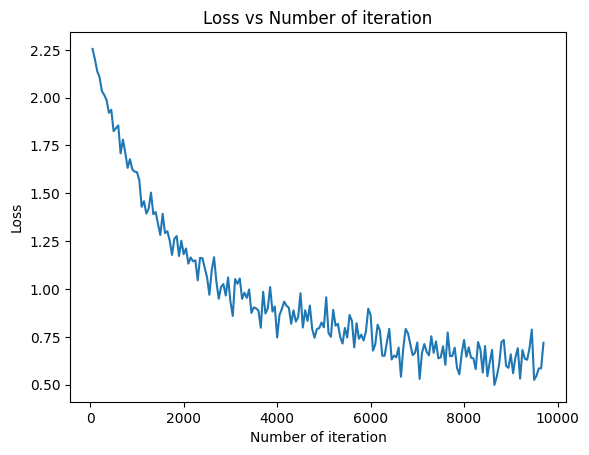

In [12]:
# visualization
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Loss vs Number of iteration")
plt.show()

### Artificial Neural Network (ANN

In [13]:
#Create ANN Model
class ANNModel(nn.Module):
  def __init__ (self, input_dim, hidden_dim, output_dim):
    super(ANNModel, self).__init__()
    #Linear function1
    self.fc1=nn.Linear(input_dim, hidden_dim)
    #Non-linearity 1
    self.relu1=nn.ReLU()
    #Linear function 2
    self.fc2=nn.Linear(hidden_dim, hidden_dim)
    #Non-linearity 2
    self.tanh2=nn.Tanh()
    #linear function 3
    self.fc3=nn.Linear(hidden_dim, hidden_dim)
    #Non-linaerity 3
    self.elu3=nn.ELU()
    #Linear funciton 4
    self.fc4=nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    #Linear function 1
    out=self.fc1(x)
    #Non-linearity 1
    out=self.relu1(out)
    #Linear function 2
    out=self.fc2(out)
    #Non-linearity2
    out=self.tanh2(out)
    #linear function 3
    out=self.fc3(out)
    #Non-linearity 3
    out=self.elu3(out)
    #Linear function 4
    out=self.fc4(out)
    return out

#Instance ANN
input_dim=28*28
hidden_dim=150
output_dim=10

#Create ANN
model=ANNModel(input_dim, hidden_dim, output_dim)
#Cross entropy loss
error=nn.CrossEntropyLoss()
#SGD Optimizer
learning_rate=0.02
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

In [14]:
# ANN model training
count=0
loss_list=[]
iteration_list=[]
accuracy_list=[]
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    train=Variable(images.view(-1, 28*28))
    labels=Variable(labels)
    #Clear gradients
    optimizer.zero_grad()
    #forward prpagation
    outputs=model(train)
    #Calculate
    loss=error(outputs, labels)
    #Calculating gradients
    loss.backward()
    #Update parameters
    optimizer.step()
    count+=1
    if count%50==0:
      #calculate accuracy
      correct=0
      total=0
      #Predict test dataset
      for images, labels in test_loader:
        test=Variable(images.view(-1, 28*28))
        #Forward propagation
        outputs=model(test)
        #Get predictions from the maximum value
        predicted=torch.max(outputs.data, 1)[1]
        #total number of labels
        total+=len(labels)
        #total correct predictions
        correct+=(predicted==labels).sum()
      accuracy=100*correct/float(total)
      #store loss and iteration
      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)
    if count % 500==0:
      print('Iteration: {} Loss: {} Accuracy: {}%'.format(count, loss.data, accuracy))


Iteration: 500 Loss: 0.7323490381240845 Accuracy: 80.1547622680664%
Iteration: 1000 Loss: 0.439066618680954 Accuracy: 87.77381134033203%
Iteration: 1500 Loss: 0.241214320063591 Accuracy: 89.57142639160156%
Iteration: 2000 Loss: 0.31178197264671326 Accuracy: 90.51190185546875%
Iteration: 2500 Loss: 0.3109372854232788 Accuracy: 91.91666412353516%
Iteration: 3000 Loss: 0.12432783097028732 Accuracy: 92.54762268066406%
Iteration: 3500 Loss: 0.24107033014297485 Accuracy: 93.28571319580078%
Iteration: 4000 Loss: 0.06679017841815948 Accuracy: 93.73809814453125%
Iteration: 4500 Loss: 0.2962178885936737 Accuracy: 94.33333587646484%
Iteration: 5000 Loss: 0.10776517540216446 Accuracy: 94.46428680419922%
Iteration: 5500 Loss: 0.19244584441184998 Accuracy: 94.66666412353516%
Iteration: 6000 Loss: 0.200821653008461 Accuracy: 95.0%
Iteration: 6500 Loss: 0.09465434402227402 Accuracy: 95.32142639160156%
Iteration: 7000 Loss: 0.11468321830034256 Accuracy: 95.60713958740234%
Iteration: 7500 Loss: 0.125225

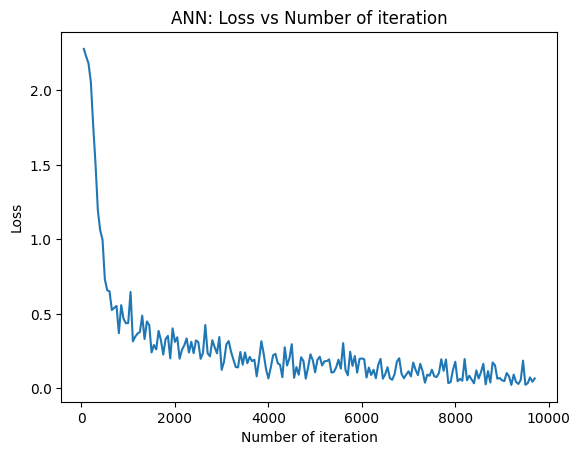

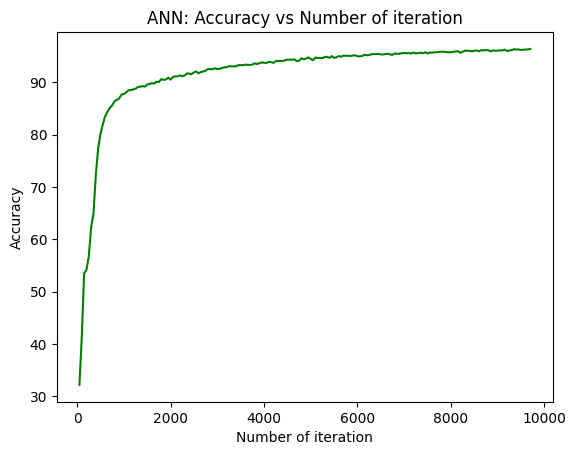

In [15]:
#Visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy
plt.plot(iteration_list,accuracy_list,color = "green")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

### Convolutional Neural Network (CNN)

In [16]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [17]:
# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()

        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()

        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        # Fully connected 1
        self.fc1 = nn.Linear(32 * 4 * 4, 10)

    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)

        # Max pool 1
        out = self.maxpool1(out)

        # Convolution 2
        out = self.cnn2(out)
        out = self.relu2(out)

        # Max pool 2
        out = self.maxpool2(out)

        # flatten
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)

        return out

# batch_size, epoch and iteration
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

# Create CNN
model = CNNModel()

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [18]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)

        # Clear gradients
        optimizer.zero_grad()

        # Forward propagation
        outputs = model(train)

        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)

        # Calculating gradients
        loss.backward()

        # Update parameters
        optimizer.step()

        count += 1

        if count % 50 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:

                test = Variable(images.view(100,1,28,28))

                # Forward propagation
                outputs = model(test)

                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]

                # Total number of labels
                total += len(labels)

                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.12067873775959015  Accuracy: 96.41666412353516 %
Iteration: 1000  Loss: 0.04549479857087135  Accuracy: 97.35713958740234 %
Iteration: 1500  Loss: 0.042838409543037415  Accuracy: 97.69047546386719 %
Iteration: 2000  Loss: 0.015830200165510178  Accuracy: 98.20237731933594 %


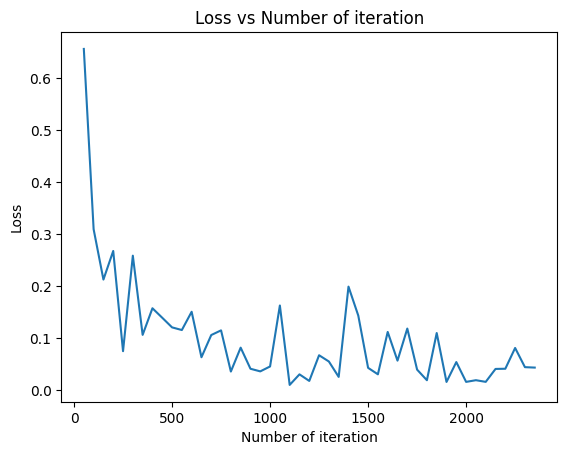

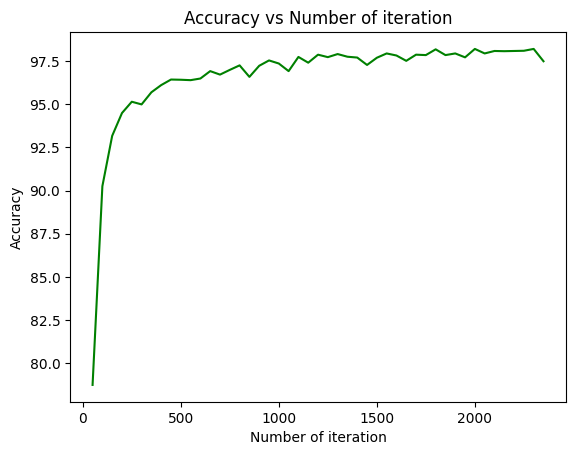

In [19]:
# visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Loss vs Number of iteration")
plt.show()

# visualization accuracy
plt.plot(iteration_list,accuracy_list,color = "green")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of iteration")
plt.show()